References - 
- [Time Series Analysis Blog](https://www.machinelearningplus.com/time-series/time-series-analysis-python/) - Credits: Selva Prabhakaran
- [Time Series Models Blog](https://towardsdatascience.com/time-series-models-d9266f8ac7b0)

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize' : (10, 7), 'figure.dpi': 120})

## Importing Time Series data

In [2]:
#import dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head(4)

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003


In [3]:
# Or as Pandas Series
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


## 1. Importing Panel Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market == 'MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 2. Visualizing Time Series

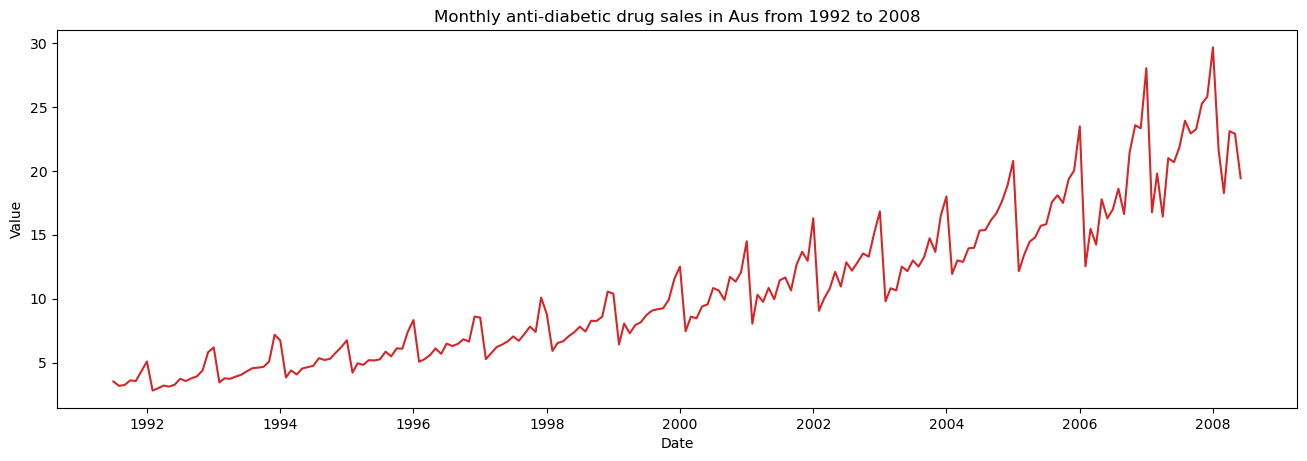

In [5]:
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

#Draw plot
def plot_df(df, x, y, title="", xlabel="Date", ylabel="Value", dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color = 'tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df.index, y=df.value, title="Monthly anti-diabetic drug sales in Aus from 1992 to 2008")

Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

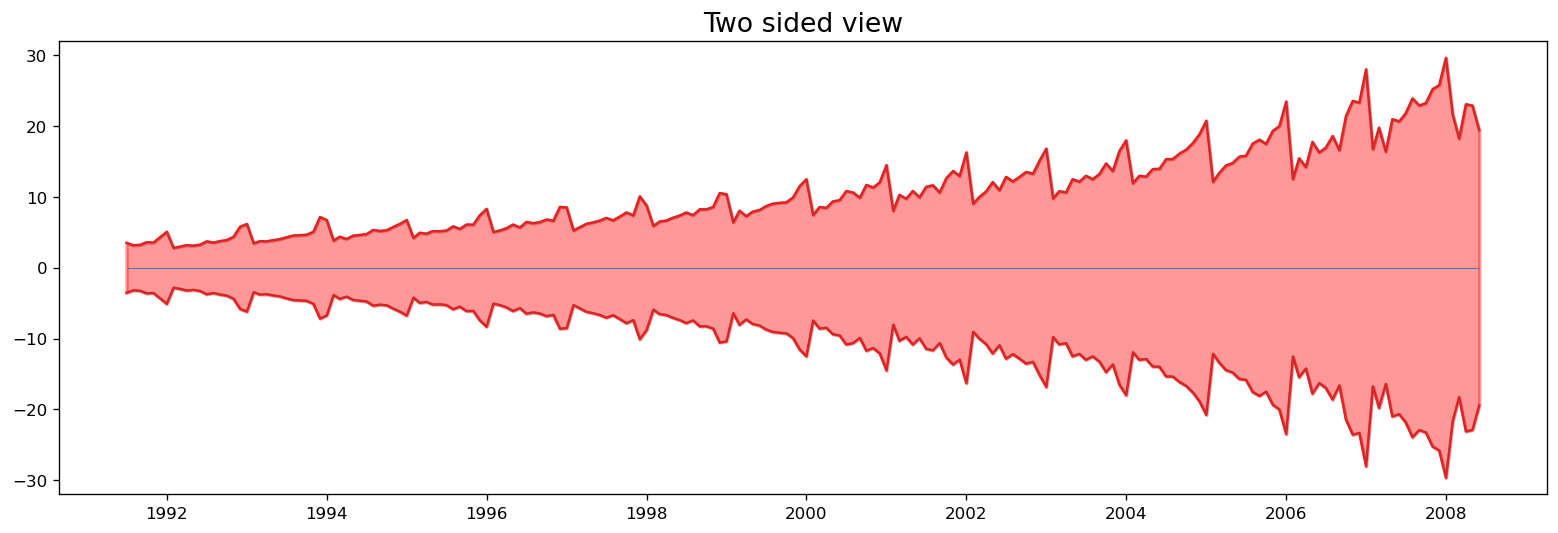

In [6]:
fig, ax = plt.subplots(1,1, figsize=(16,5), dpi=120)
plt.plot(df.index, df.value, color = 'tab:red')
plt.fill_between(df.index, y1=df.value, y2=-df.value, alpha=0.4, linewidth=2, color='red')
plt.plot(df.index, -df.value, color = 'tab:red')

plt.ylim(-32,32)
plt.title('Two sided view', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

For a Monthly time series if it follows certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.  

## 3. Seasonal Plot of Time Series

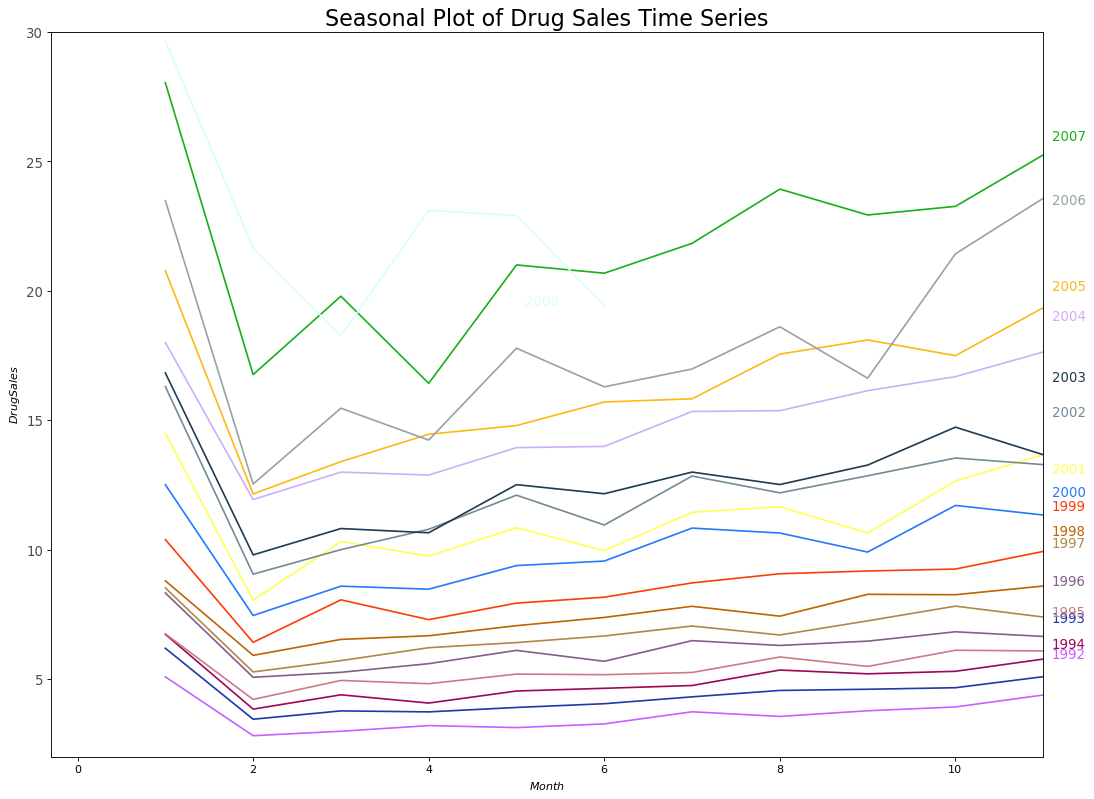

In [7]:
#Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#Prepare Data
df['year'] = [d.year for d in df.date]
df['month'] = [d.month for d in df.date]
years = df['year'].unique()

#Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#Draw plot
plt.figure(figsize=(16,12), dpi=80)

for i,y in enumerate(years):
    if i>0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0] - .9, df.loc[df.year==y, 'value'][-1:].values[0], \
                    y, fontsize=12, color=mycolors[i])

#Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2,30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title('Seasonal Plot of Drug Sales Time Series', fontsize=20)
plt.show()

There is a steep fall in drug sales every February, rising again in March, falling again in April and so on. Clearly, the pattern repeats within a given year, every year.  

However, as years progress, the drug sales increase overall. You can nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, you can do a month-wise boxplot to visualize the monthly distributions.  

## 4. Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

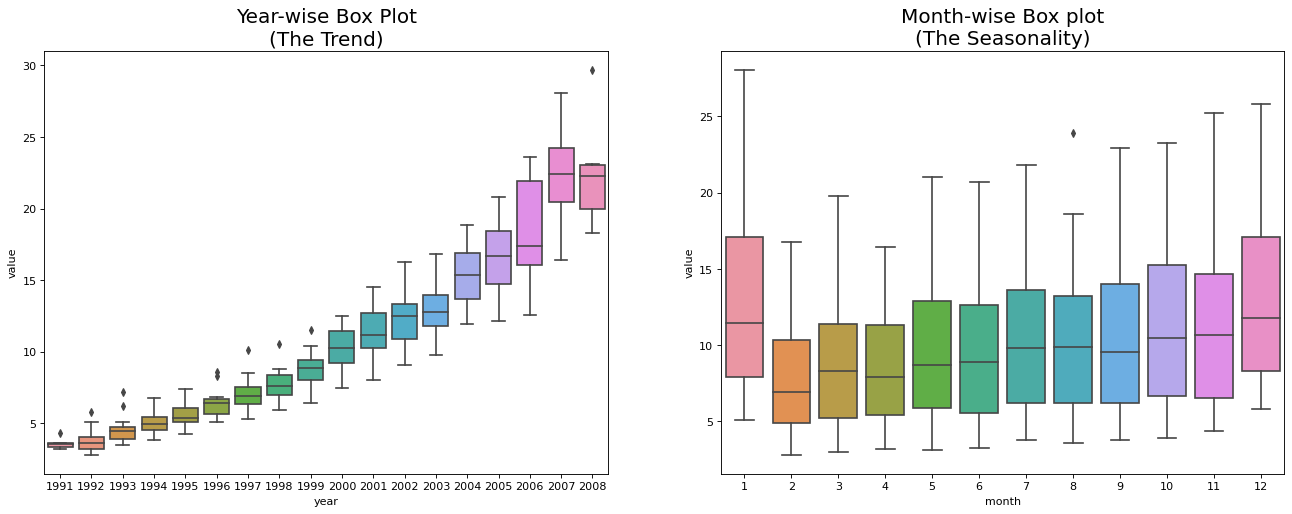

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.month for d in df.date]
years = df['year'].unique()

#Draw plot
fig, axes = plt.subplots(1,2, figsize=(20,7), dpi=80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991,2008]), :])

#Set title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has higher drug sales, which can be attributed to the holiday discounts season.  

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

## 5. Patterns in a time series

Any time series may be split into the following components: **Base Level + Trend + Seasonality + Error**

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

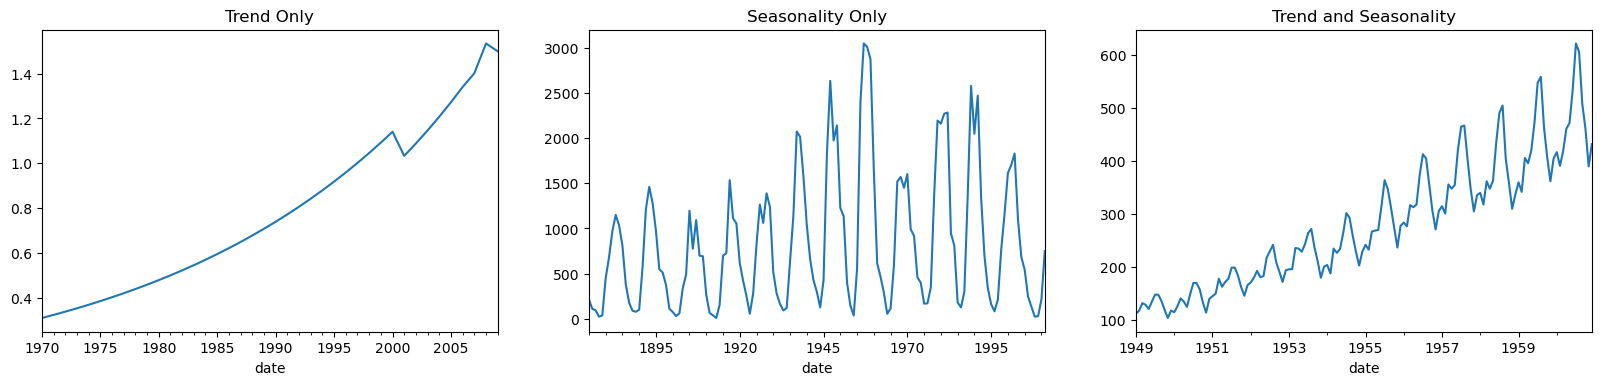

In [9]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.  

## 6. Additive and multiplicative time series
Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:  

### Additive time series:
Value = Base Level + Trend + Seasonality + Error

### Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error  

## 7. How to decompose a time series into its components?
You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

		Multiplicative Decompose 								 Additive Decompose


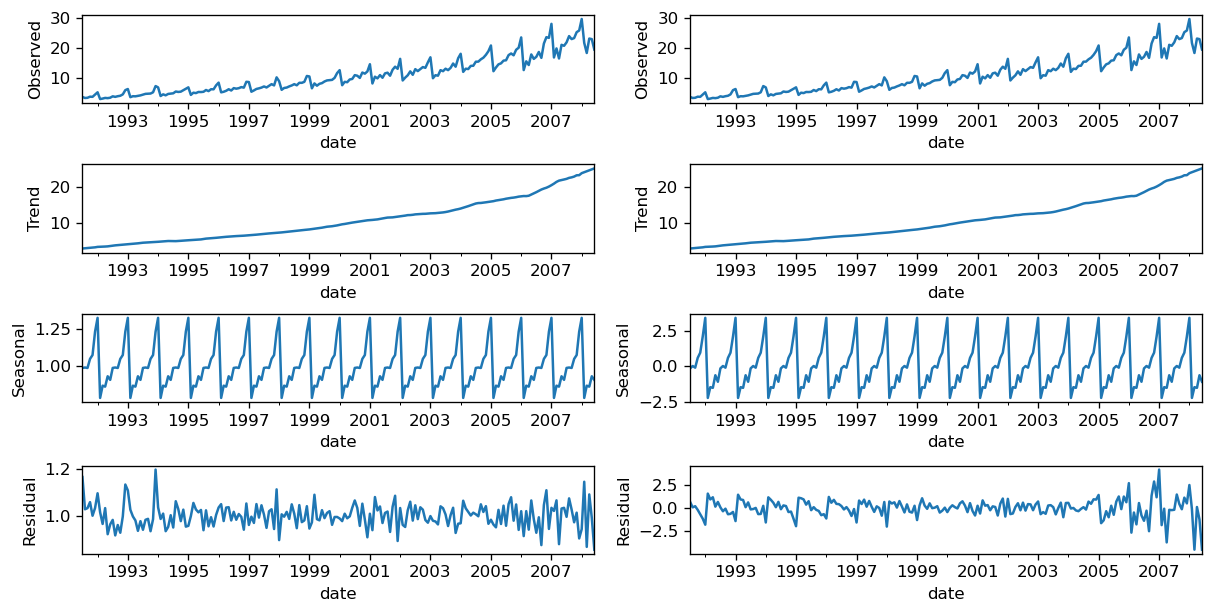

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

#Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

#Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

#plot
plt.rcParams.update({'figure.figsize':(10,10)})

fig,axes = plt.subplots(4,2, figsize=(10,5), constrained_layout=True)

print("\t\tMultiplicative Decompose \t\t\t\t\t\t\t\t Additive Decompose")
def plotseasonal(result, axes, axcol ):
    result.observed.plot(ax=axes[0][axcol], legend=False)
    axes[0][axcol].set_ylabel('Observed')
    result.trend.plot(ax=axes[1][axcol], legend=False)
    axes[1][axcol].set_ylabel('Trend')
    result.seasonal.plot(ax=axes[2][axcol], legend=False)
    axes[2][axcol].set_ylabel('Seasonal')
    result.resid.plot(ax=axes[3][axcol], legend=False)
    axes[3][axcol].set_ylabel('Residual')

plotseasonal(result_mul, axes, 0)
plotseasonal(result_add, axes, 1)
plt.show()

Setting **extrapolate_trend='freq'** takes care of any missing values in the trend and residuals at the beginning of the series.

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the **result_mul** output itself. Let’s extract them and put it in a dataframe.

In [11]:
#Extract the Components ----
#Actual values = Product of  (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


If you check, the product of seas, trend and resid columns should exactly equal to the actual_values.

## 8. Stationary and Non-Stationary Time Series
Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

A stationary time series id devoid of seasonal effects as well.

So how to identify if a series is stationary or not? Let’s plot some examples to make it clear,

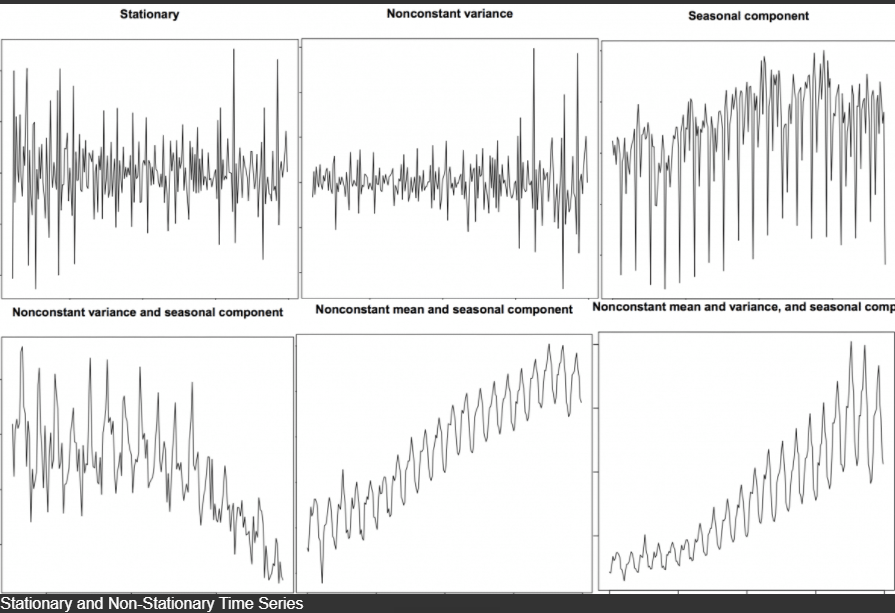

The above image is sourced from R’s **TSTutorial**.

So why does a stationary series matter? why am I even talking about it?
I will come to that in a bit, but understand that it is possible to make nearly any time series stationary by applying a suitable transformation. Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

## 9. Time Series Models 
[Reference](https://towardsdatascience.com/time-series-models-d9266f8ac7b0)  
Specially check for - 
- **Auto Correlation Function (ACF)**: Auto Correlation function takes into consideration of all the past observations irrespective of its effect on the future or present time period. It calculates the correlation between the t and (t-k) time period. It includes all the lags or intervals between t and (t-k) time periods. Correlation is always calculated using the Pearson Correlation formula.
- **Partial Correlation Function (PACF)**:The PACF determines the partial correlation between time period t and t-k. It doesn’t take into consideration all the time lags between t and t-k. For e.g. let's assume that today's stock price may be dependent on 3 days prior stock price but it might not take into consideration yesterday's stock price closure. Hence we consider only the time lags having a direct impact on future time period by neglecting the insignificant time lags in between the two-time slots t and t-k.
- **AutoRegressive Model (AR)**: The time period at t is impacted by the observation at various slots t-1, t-2, t-3, ….., t-k. Considers PACF
- **MA (Moving Average) Model**: The time period at t is impacted by the unexpected external factors at various slots t-1, t-2, t-3, ….., t-k. Considers ACF.
- **ARMA (Auto Regressive Moving Average) Model**: This is a model that is combined from the AR and MA models. In this model, the impact of previous lags along with the residuals is considered for forecasting the future values of the time series. Considers both ACF and PACF.
- **ARIMA (Auto-Regressive Integrated Moving Average) Model**: ARIMA model is a combination of a number of differences already applied on the model in order to make it stationary, the number of previous lags along with residuals errors in order to forecast future values.
    - In order to apply the various models we must in the beginning convert the series into Stationary Time Series. 
    - So to achieve the same, we apply the differencing or Integrated method where we subtract the $t-1$ value from $t$ values of time series.
    - After applying the first differencing if we are still unable to get the Stationary time series then we again apply the second-order differencing.

## 10. How to make a time series stationary?
You can make series stationary by:

Differencing the Series (once or more)
Take the log of the series
Take the nth root of the series
Combination of the above
The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

So what is differencing?

If $Y_t$ is the value at time ‘t’, then the first difference of $Y$ = $Y_t$ – $Y_{t-1}$. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on.

For example, consider the following series: [1, 5, 2, 12, 20]

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

## 11. Why make a non-stationary series stationary before forecasting?
Forecasting a stationary series is relatively easy and the forecasts are more reliable.
An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

Now that we’ve established that stationarizing the series important, how do you check if a given series is stationary or not?

## 12. How to test for stationarity?
The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called **‘Unit Root Tests’**. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)  

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, if the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

In [12]:
from statsmodels.tsa.stattools import adfuller , kpss

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

#ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistics: {result[0]}')
print(f'\tp-value: {result[1]}')

for key, value in result[4].items():
    print('\tCritical Values:')
    print(f'\t\t{key},{value}')
    
#KPSS Test
result = kpss(df.value.values, regression='c')
print('\n\nKPSS Statistic: %f' % result[0])
print('\tp-value: %f' % result[1])

for key, value in result[3].items():
    print('\tCritial Values:')
    print(f'\t\t{key}, {value}')

ADF Statistics: 3.1451856893067363
	p-value: 1.0
	Critical Values:
		1%,-3.465620397124192
	Critical Values:
		5%,-2.8770397560752436
	Critical Values:
		10%,-2.5750324547306476


KPSS Statistic: 1.313675
	p-value: 0.010000
	Critial Values:
		10%, 0.347
	Critial Values:
		5%, 0.463
	Critial Values:
		2.5%, 0.574
	Critial Values:
		1%, 0.739


C:\Users\mruty\anaconda3\envs\gputest\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\mruty\anaconda3\envs\gputest\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## 13. What is the difference between white noise and a stationary series?
Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.  

In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.

<AxesSubplot:title={'center':'Random White Noise'}>

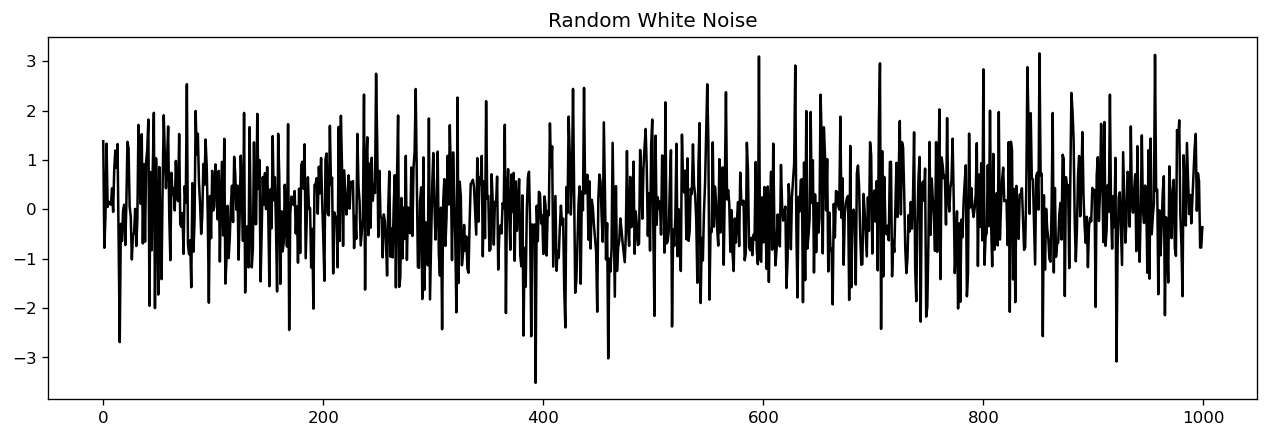

In [13]:
randvals = np.random.randn(1000)

pd.Series(randvals).plot(title='Random White Noise', color='k', figsize=(13,4))

## 14. How to detrend a time series?
Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
- Subtract the trend component obtained from time series decomposition we saw earlier.
- Subtract the mean
- Apply a filter like **Baxter-King filter**(statsmodels.tsa.filters.bkfilter) or the **Hodrick-Prescott Filter** (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.  

Let’s implement the first two methods.


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

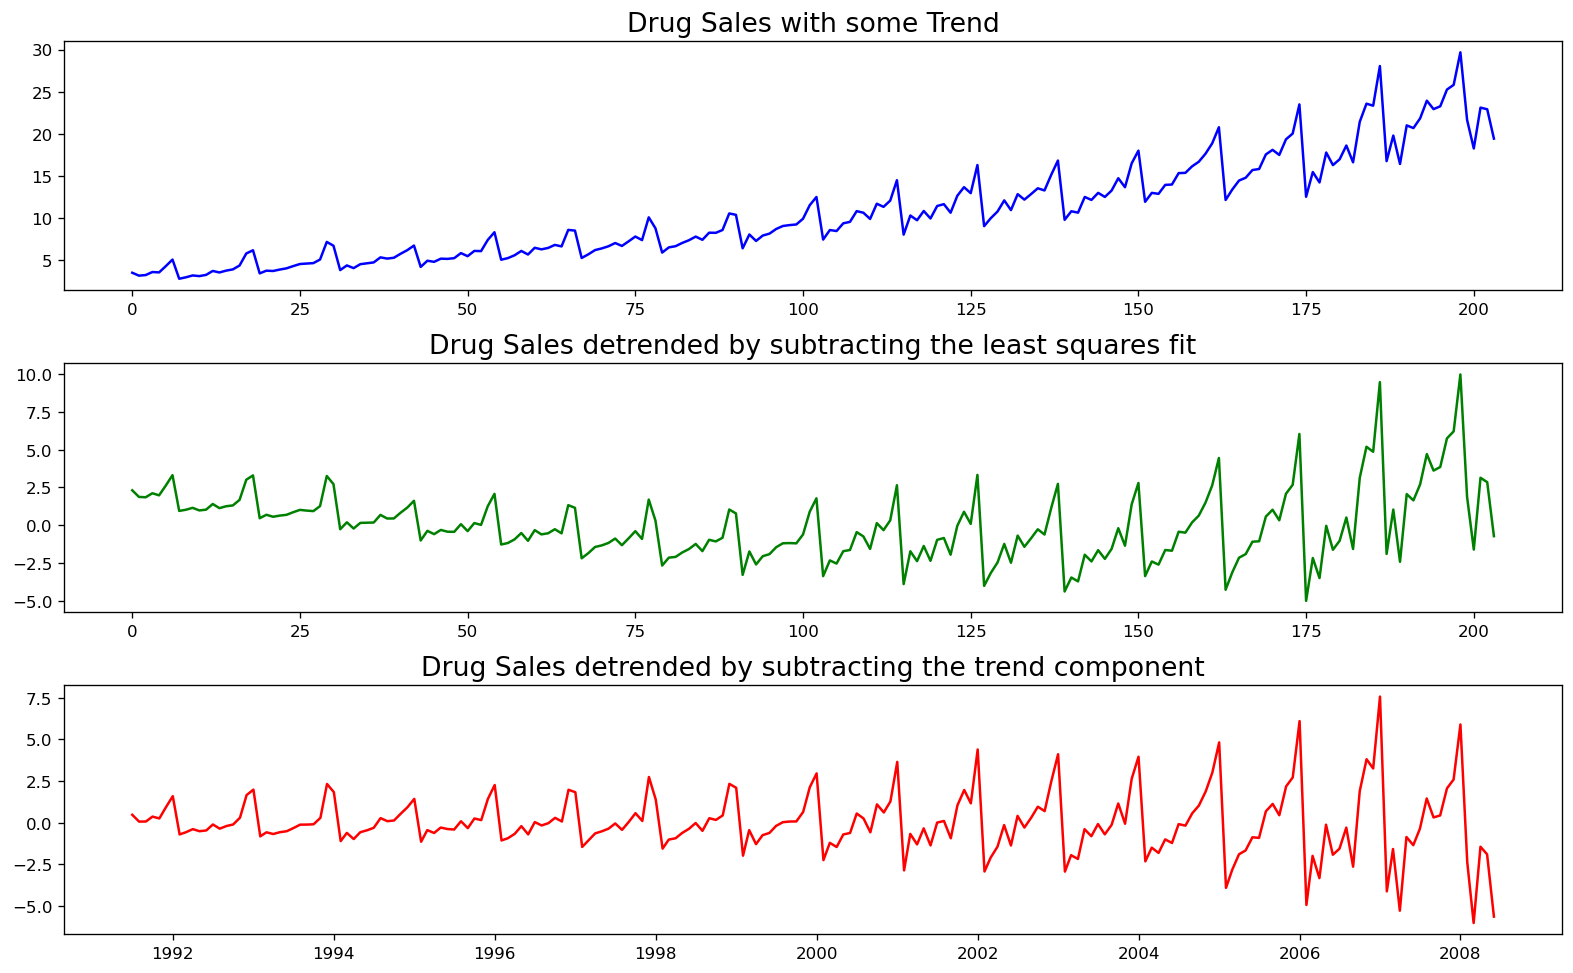

In [14]:
### Using scipy: Substract the line of best fit
from scipy import signal

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended_sub_best_fit = signal.detrend(df.value.values)

from statsmodels.tsa.seasonal import seasonal_decompose

### Using statsmodels: Substracting the Trend Compnent
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended_seasonal_trend = df.value.values - result_mul.trend

# Plotting
fig, axes = plt.subplots(3,1, figsize=(13,8), constrained_layout=True)

plt.sca(axes[0])
plt.plot(df.value.values, color='b')
plt.title('Drug Sales with some Trend', fontsize=16)

plt.sca(axes[1])
plt.plot(detrended_sub_best_fit, color='g')
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

plt.sca(axes[2])
plt.plot(detrended_seasonal_trend, color='r')
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

## 15. How to deseasonalize a time series?
There are multiple approaches to deseasonalize a time series as well. Below are a few:  
- 1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.
- 2. Seasonal difference the series (subtract the value of previous season from the current value)
- 3. Divide the series by the seasonal index obtained from STL decomposition  

If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.

[]

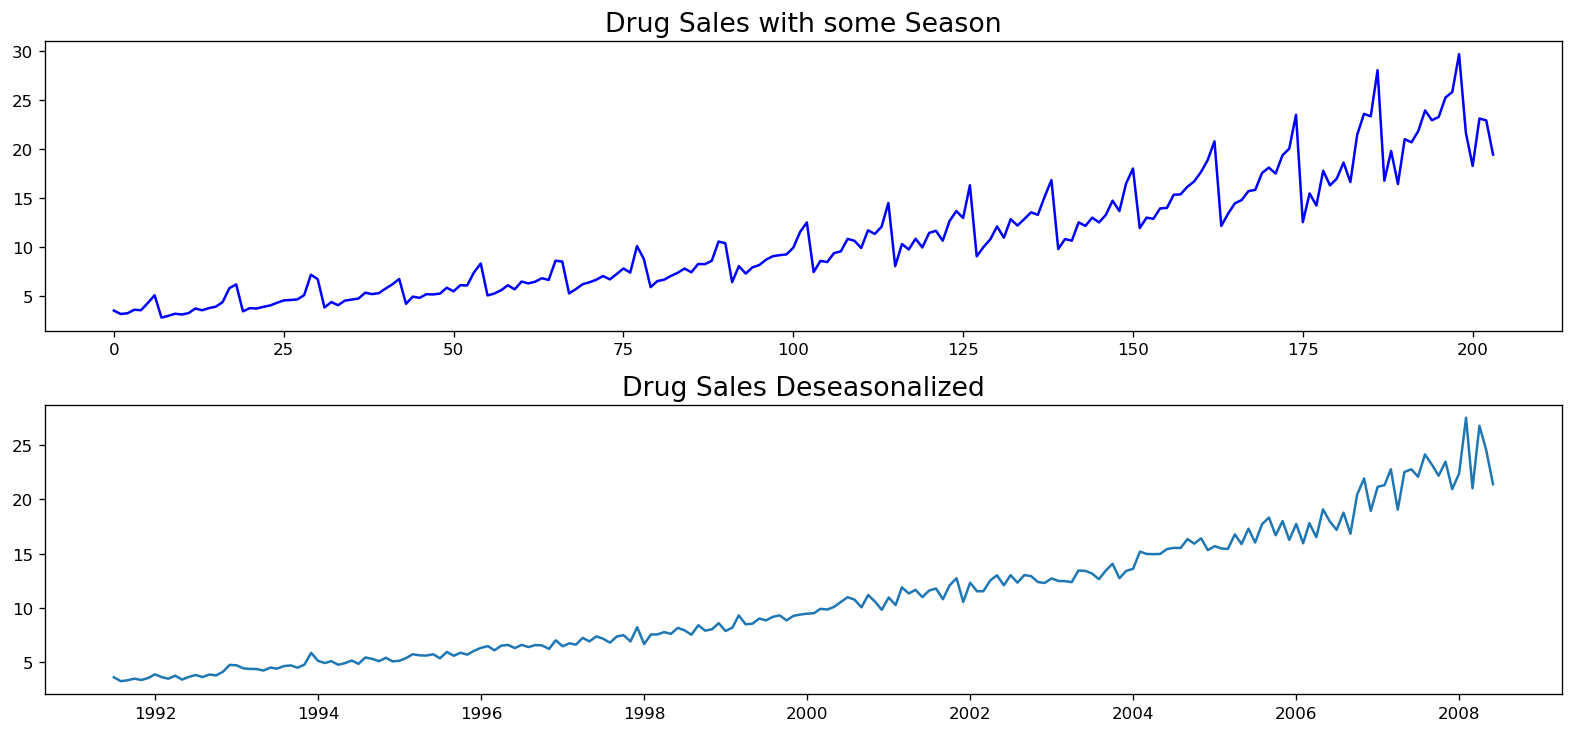

In [15]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
fig, axes = plt.subplots(2,1, figsize=(13,6), constrained_layout=True)

plt.sca(axes[0])
plt.plot(df.value.values, color='b')
plt.title('Drug Sales with some Season', fontsize=16)

plt.sca(axes[1])
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## 16. How to test for seasonality of a time series?
The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

- Hour of day
- Day of month
- Weekly
- Monthly
- Yearly  

However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. More on the ACF in the upcoming sections. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

For example, the drug sales time series is a monthly series with patterns repeating every year. So, you can see spikes at 12th, 24th, 36th.. lines.
I must caution you that in real word datasets such strong patterns is hardly noticed and can get distorted by any noise, so you need a careful eye to capture these patterns.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

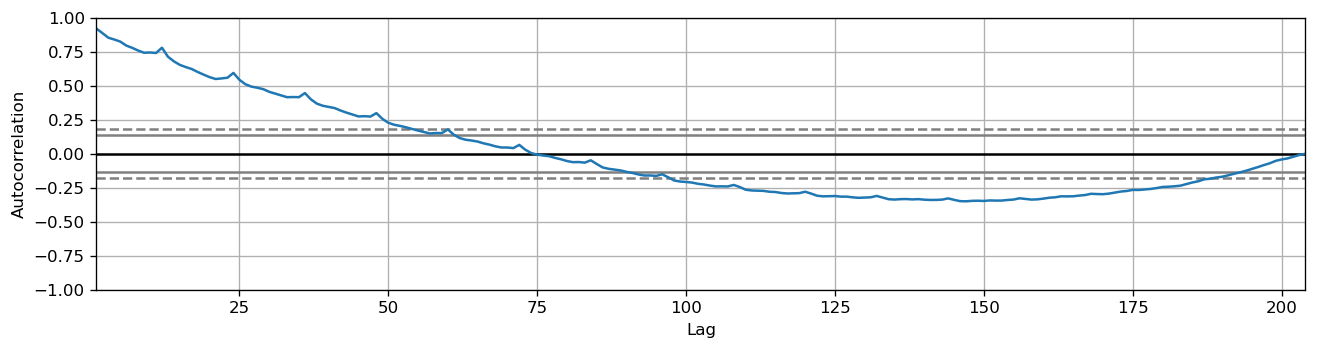

In [16]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(13,3), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

Alternately, if you want a statistical test, the **[CHTest](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest)** can determine if seasonal differencing is required to stationarize the series.

## 17. How to treat missing values in a time series?
Sometimes, your time series will have missing dates/times. That means, the data was not captured or was not available for those periods. It could so happen the measurement was zero on those days, in which case, case you may fill up those periods with zero.

Secondly, when it comes to time series, you should typically NOT replace missing values with the mean of the series, especially if the series is not stationary. What you could do instead for a quick and dirty workaround is to forward-fill the previous value.

However, depending on the nature of the series, you want to try out multiple approaches before concluding. Some effective alternatives to imputation are:

- Backward Fill
- Linear Interpolation
- Quadratic interpolation
- Mean of nearest neighbors
- Mean of seasonal couterparts  

To measure the imputation performance, I manually introduce missing values to the time series, impute it with above approaches and then measure the mean squared error of the imputed against the actual values.

Something went wront with knn_mean: Input contains NaN, infinity or a value too large for dtype('float64').


<ipython-input-17-8bd9061fb82b>:55: RuntimeWarning: Mean of empty slice
  out[i] = np.nanmean(ts_near)


<AxesSubplot:title={'center':'Seasonal Mean (MSE: 0.67)'}, xlabel='date'>

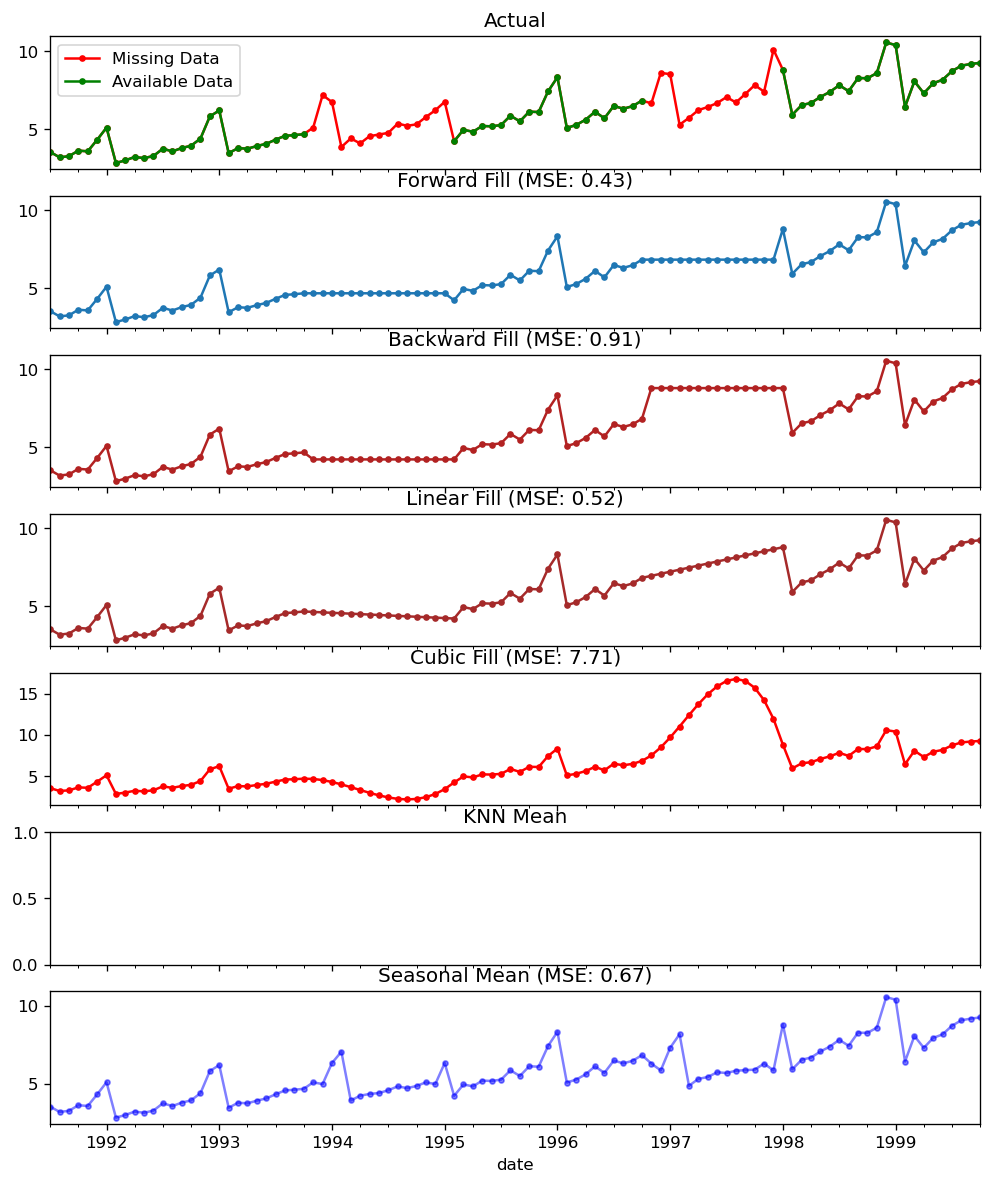

In [17]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('https://raw.githubusercontent.com/mrutyunjay17/Hands-On-Machine-Learning/main/time_series_forecasting/datasets/tsa_missings.csv', \
                 parse_dates=['date'], index_col='date')

df = df.iloc[:100]

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

try:
    df['knn_mean'] = knn_mean(df.value.values, 8)
    error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
    df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")
except Exception as ex:
    plt.sca(axes[5])
    plt.title("KNN Mean")
    print("Something went wront with knn_mean:", ex)


## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

You could also consider the following approaches depending on how accurate you want the imputations to be.

- If you have explanatory variables use a prediction model like the random forest or k-Nearest Neighbors to predict it.
- If you have enough past observations, forecast the missing values.
- If you have enough future observations, backcast the missing values
- Forecast of counterparts from previous cycles  

## 18. What is autocorrelation and partial autocorrelation functions?
**Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

**Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

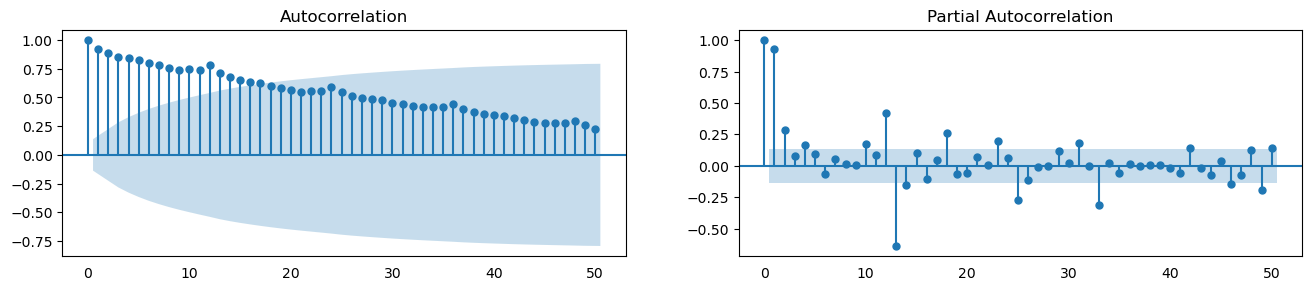

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])
plt.show()

## 19. How to compute partial autocorrelation function?

So how to compute partial autocorrelation?  

The partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

For Example, if $Y_t$ is the current series and $Y_{t-1}$ is the ***lag 1*** of $Y$, then the partial autocorrelation of ***lag 3*** $Y_{t-3}$ is the coefficient $\alpha_3$ of $Y_{t-3}$ in the following equation:  

$Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \alpha_2 Y_{t-2} + \alpha_3 Y_{t-3}$

## 20. Lag Plots
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In below example on Sunspots area time series, the plots get more and more scattered as the n_lag increases.

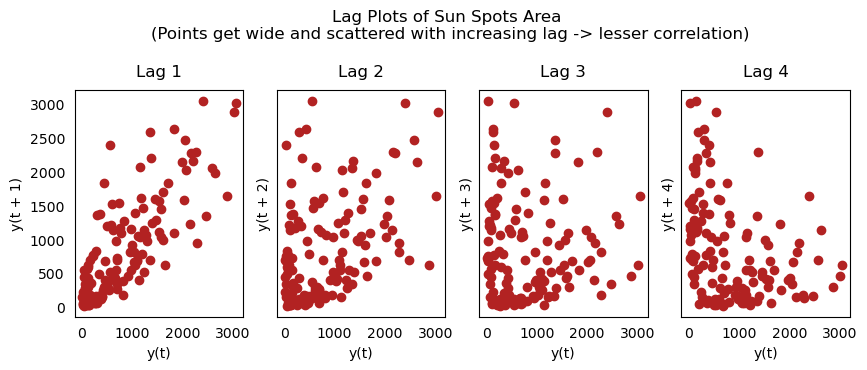

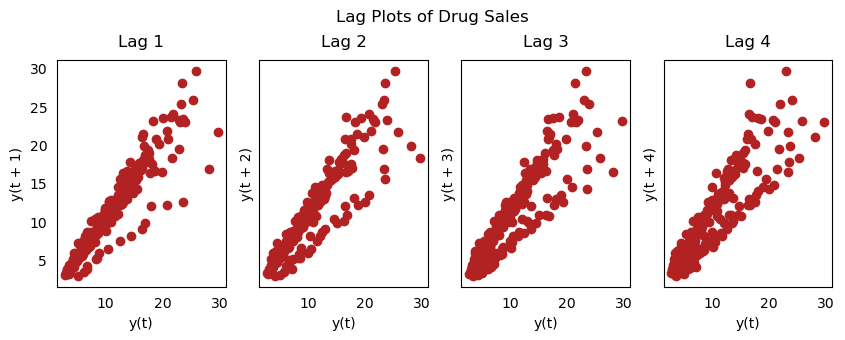

In [19]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

## 21. How to estimate the forecastability of a time series?
The more regular and repeatable patterns a time series has, the easier it is to forecast. The **‘Approximate Entropy’** can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the **‘Sample Entropy’**.

Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’.

Sample Entropy handles this problem nicely. See the demonstration below.

In [20]:

ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

<ipython-input-21-30c8ba06fa59>:28: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


Text(0.5, 1.0, 'rand_big: Approx. Entropy=0.67, Sample Entropy=2.27')

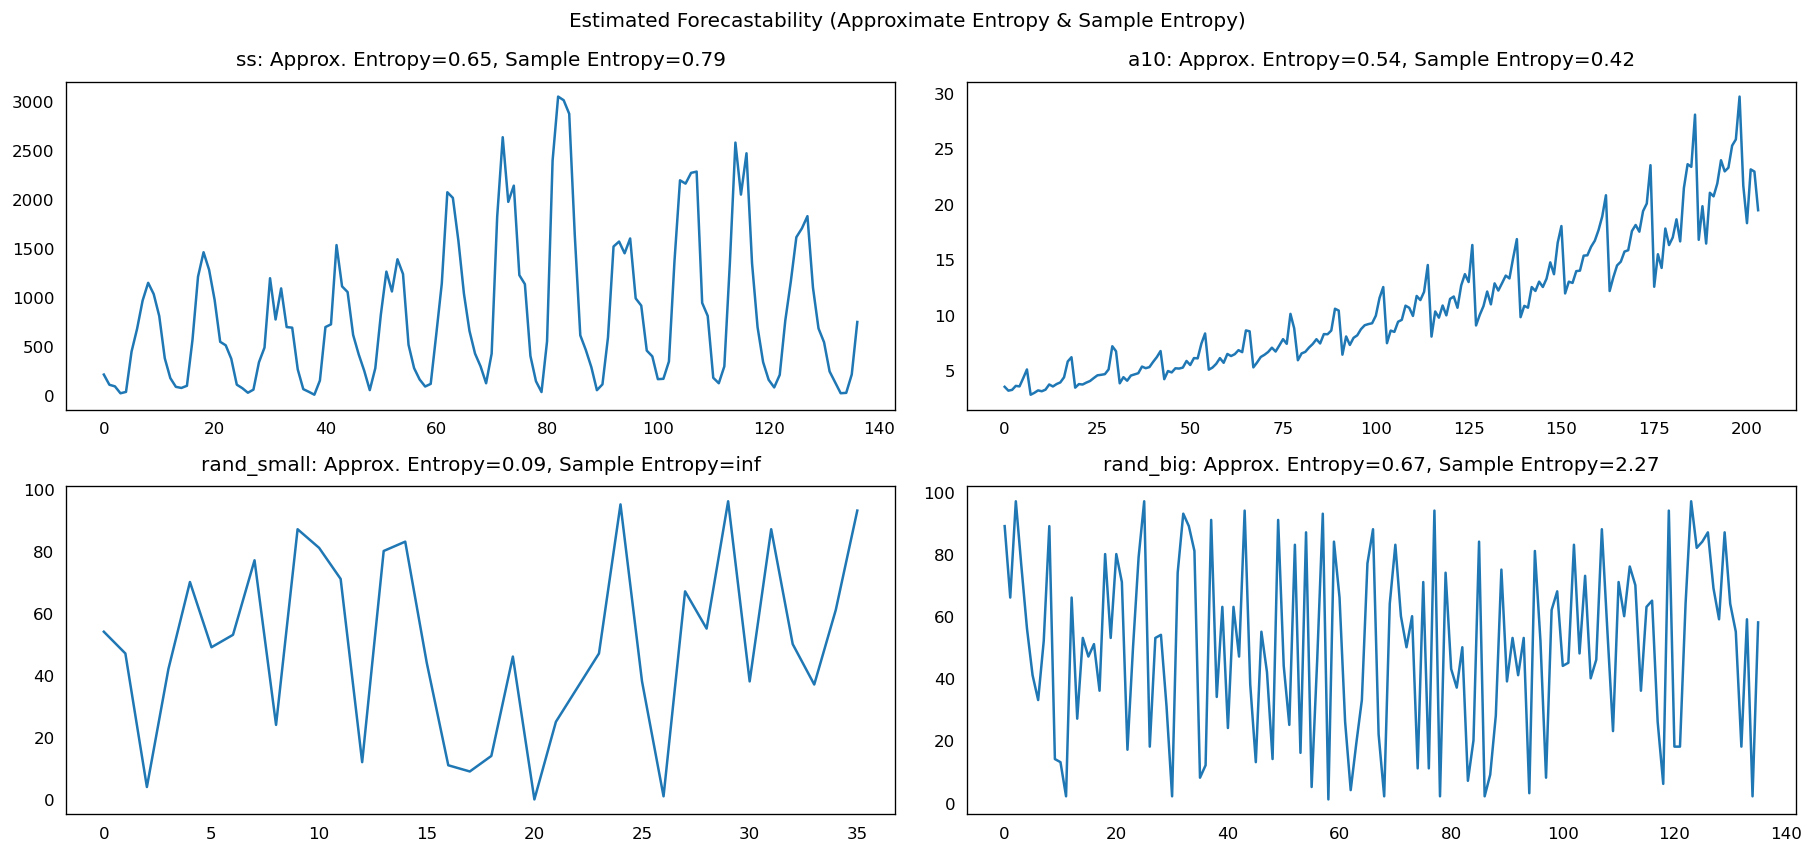

In [21]:
# https://en.wikipedia.org/wiki/Approximate_entropy
def get_approximate_entropy(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))


# https://en.wikipedia.org/wiki/Sample_entropy
def get_sample_entropy(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

ss_approx_entr = get_approximate_entropy(ss.value, m=2, r=0.2*np.std(ss.value))
ta10_approx_entr = get_approximate_entropy(a10.value, m=2, r=0.2*np.std(a10.value))
trand_small_approx_entr = get_approximate_entropy(rand_small, m=2, r=0.2*np.std(rand_small))
trand_big_approx_entr = get_approximate_entropy(rand_big, m=2, r=0.2*np.std(rand_big))

ss_samp_entr = get_sample_entropy(ss.value, m=2, r=0.2*np.std(ss.value))
ta10_samp_entr = get_sample_entropy(a10.value, m=2, r=0.2*np.std(a10.value))
trand_small_samp_entr = get_sample_entropy(rand_small, m=2, r=0.2*np.std(rand_small))
trand_big_samp_entr = get_sample_entropy(rand_big, m=2, r=0.2*np.std(rand_big))


fig, axes = plt.subplots(2,2, figsize=(15, 7), constrained_layout=True)
fig.suptitle("Estimated Forecastability (Approximate Entropy & Sample Entropy)")

plt.sca(axes[0][0])
plt.plot(ss.value)
plt.title("ss: Approx. Entropy=%.2f, Sample Entropy=%.2f" % (ss_approx_entr, ss_samp_entr))

plt.sca(axes[0][1])
plt.plot(a10.value)
plt.title("a10: Approx. Entropy=%.2f, Sample Entropy=%.2f" % (ta10_approx_entr, ta10_samp_entr))

plt.sca(axes[1][0])
plt.plot(rand_small)
plt.title("rand_small: Approx. Entropy=%.2f, Sample Entropy=%.2f" % (trand_small_approx_entr, trand_small_samp_entr))

plt.sca(axes[1][1])
plt.plot(rand_big)
plt.title("rand_big: Approx. Entropy=%.2f, Sample Entropy=%.2f" % (trand_big_approx_entr, trand_big_samp_entr))

## 22. Why and How to smoothen a time series?
Smoothening of a time series may be useful in:
- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better  

So how to smoothen a series? Let’s discuss the following methods:

- Take a moving average
- Do a LOESS smoothing (Localized Regression)
- Do a LOWESS smoothing (Locally Weighted Regression)  

**Moving average** is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

**LOESS**, short for **‘LOcalized regrESSion’** fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

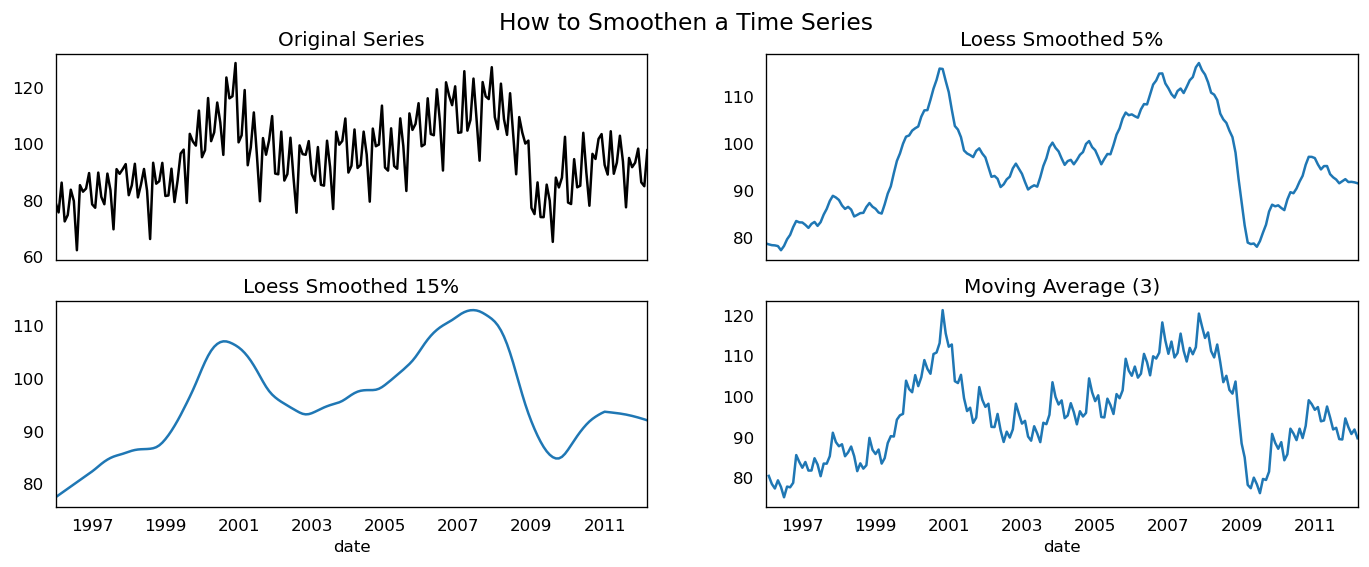

In [32]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

#Import
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv', parse_dates=['date'], index_col='date')

#1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

#2. Losses Smmothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

fig, axes = plt.subplots(2,2, figsize=(14, 5), sharex=True, dpi=120)

df_orig['value'].plot(ax=axes[0][0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[0][1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[1][0], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[1][1], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()


## How to use Granger Causality test to know if one time series is helpful in forecasting another?  

Granger causality test is used to determine if one time series will be useful to forecast another.

How does Granger causality test work?

It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.

So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.

It is nicely implemented in the statsmodel package.

It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column.
The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

The second argument ***maxlag*** says till how many lags of Y should be included in the test.

In [34]:
from statsmodels.tsa.stattools import grangercausalitytests

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month

grangar_cas = grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


In the above case, the P-Values are Zero for all tests. So the ‘month’ indeed can be used to forecast the Air Passengers.